In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
columns = ['PRB_UTILIZATION', 'RRC_USER', 'PAYLOAD', 'LTE_DL_USER_THROUGHPUT_kbps']
df = pd.read_csv("data.csv", usecols=columns, encoding='latin-1')
df.head()

,PRB_UTILIZATION,RRC_USER,PAYLOAD,LTE_DL_USER_THROUGHPUT_kbps
0,0.788342,40.56900,5578.5300,6851.178
1,0.996347,189.60725,12526.7775,2727.430
2,0.866482,56.71725,6454.2875,5754.734
3,0.575340,49.06525,6588.3050,16473.076
4,0.989565,160.48700,7454.7550,2005.030


In [ ]:
df = df.dropna()
q1 = df["LTE_DL_USER_THROUGHPUT_kbps"].quantile(0.25)
q3 = df["LTE_DL_USER_THROUGHPUT_kbps"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["LTE_DL_USER_THROUGHPUT_kbps"] >= lower_bound) & (df["LTE_DL_USER_THROUGHPUT_kbps"] <= upper_bound)]
df

,PRB_UTILIZATION,RRC_USER,PAYLOAD,LTE_DL_USER_THROUGHPUT_kbps
0,0.788342,40.56900,5578.5300,6851.178
1,0.996347,189.60725,12526.7775,2727.430
2,0.866482,56.71725,6454.2875,5754.734
3,0.575340,49.06525,6588.3050,16473.076
4,0.989565,160.48700,7454.7550,2005.030
...,...,...,...,...
89995,0.985400,273.57575,11129.7925,2207.350
89996,0.982738,183.75800,14468.6875,4124.812
89997,0.159270,3.45125,4400.9500,28423.114
89998,0.261028,3.41500,1827.2600,15221.762


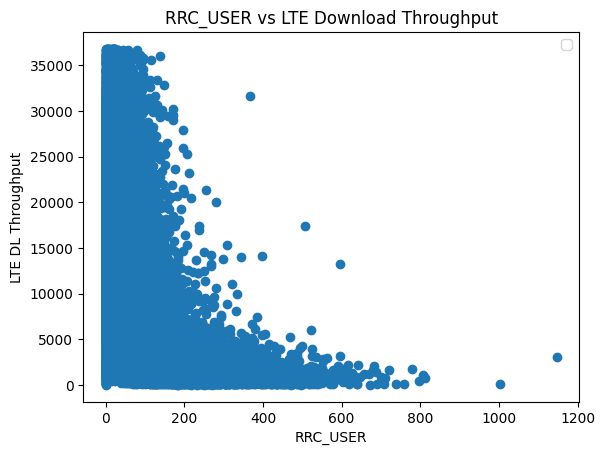

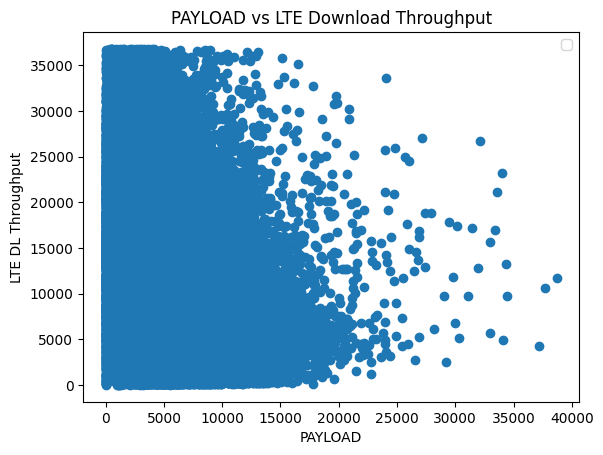

In [ ]:
for label in df.columns[1:]:
  if label == 'LTE_DL_USER_THROUGHPUT_kbps': continue
  plt.scatter(df[label], df['LTE_DL_USER_THROUGHPUT_kbps'])
  plt.title(f"{label} vs LTE Download Throughput")
  plt.ylabel("LTE DL Throughput")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
X = df.drop('LTE_DL_USER_THROUGHPUT_kbps', axis=1)
y = df['LTE_DL_USER_THROUGHPUT_kbps']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

ValueError: continuous is not supported

In [ ]:
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
mse

20439410.61410957

In [ ]:
r2 = r2_score(y_pred=y_pred, y_true=y_test)
r2

0.7114284215305056

In [ ]:
import joblib
joblib.dump(lin_reg, "model.joblib")

['model.joblib']

# Using Neural Networks

In [ ]:
normalizer = tf.keras.layers.Normalization(input_shape=(3,), axis=None)
normalizer.adapt(X_train.reshape(-1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
nn_model = tf.keras.Sequential([
    # all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train, y_train, verbose=1, epochs=100, validation_data=(X_test, y_test)
)

Epoch 1/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 29101276.0000 - val_loss: 28433760.0000
Epoch 2/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 28615534.0000 - val_loss: 27832982.0000
Epoch 3/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 27782080.0000 - val_loss: 27112126.0000
Epoch 4/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 27338766.0000 - val_loss: 26776642.0000
Epoch 5/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 27163118.0000 - val_loss: 27343248.0000
Epoch 6/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 26439812.0000 - val_loss: 26974100.0000
Epoch 7/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 25967658.0000 - val_loss: 25349100.0000
Epoch 8/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 25285216.0000 - val_loss: 24889956.0000
Epoch 9/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 24933260.0000 - val_loss: 24412494.0000
Epoch 10/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 24621676.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

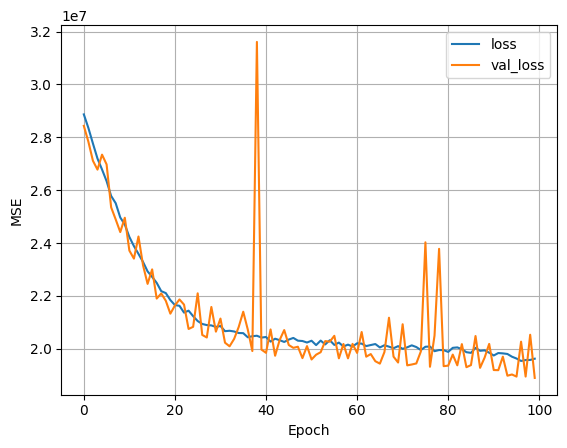

In [ ]:
plot_loss(history)

In [ ]:
X_train

,PRB_UTILIZATION,RRC_USER,PAYLOAD
9930,0.975328,101.367250,5592.8875
56484,0.712890,46.547750,6314.5350
16830,0.160203,20.914500,1585.1850
55787,0.302663,37.350000,2715.3975
64135,0.609735,41.028250,3074.6050
...,...,...,...
6411,0.165895,6.421000,1130.2850
56643,0.370007,36.116750,4981.1800
79497,0.616325,39.253500,3344.1525
878,0.857100,134.460764,9295.1050


In [ ]:
y_train.shape

(69563,)

In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred, y_test)

20439410.61410957